# ML Flight Fare Prediction (Kaggle Problem Statement)

### In this notebook, I have made an attempt to develop a model to solve the Kaggle Problem Statement - Flight Fare Prediction using ML Regression. Here, I have implemented various ML regression models and finally decided upon Random Forest Regressor for predictions.  

# Importing the libraries and the dataset

In [5]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_columns', None)

In [17]:
#data is in excel format so, read data as 'read_excel'
train = pd.read_excel(r'C:\Users\HP\Desktop\Flight Fare Prediction\notebook\Data\Data_Train.xlsx')

train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [18]:
test = pd.read_excel(r'C:\Users\HP\Desktop\Flight Fare Prediction\notebook\Data\Test_set.xlsx')
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [19]:
print('Training dataset shape:', train.shape)
print('Test dataset shape:', test.shape)

Training dataset shape: (10683, 11)
Test dataset shape: (2671, 10)


# Checking if there are any missing values in Training and Test Dataset  

In [20]:
train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [21]:
train[train['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [22]:
train[train['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [23]:
train=train.dropna(axis=0, how='any')
#since, there is only one missing value in Total_Stops and Route and both coincidentally are from same record, we can just drop that record/row

In [24]:
train.shape

(10682, 11)

In [25]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [26]:
test.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

No missing values in Test dataset, and the missing value row in Training dataset has been removed.

# Feature Engineering on Training Set 

Looking at the dataset, there are 4 columns with date-time variables and we need to apply featrure engineering to those columns

In [27]:
#First we consider Duration column
train["Duration"].value_counts()

Duration
2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: count, Length: 368, dtype: int64

In [28]:
# Converting 'Duration' column into a list
duration_train = list(train["Duration"])
duration_train

['2h 50m',
 '7h 25m',
 '19h',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 20m',
 '18h',
 '9h 15

In [29]:
#apply loop to separate hours from minutes
#.split() method splits a string into a list
#also, hour is represented by 'h' and minute by'm'
#.strip() method returns a copy of the string by removing both the leading and the trailing characters

for i in range(len(duration_train)):
    if len(duration_train[i].split()) != 2:   
        if "h" in duration_train[i]:
            duration_train[i] = duration_train[i].strip() + ' 0m'  # add 0 minute 
        else:
            duration_train[i] = '0h '+ duration_train[i]           # add 0 hour

In [30]:
duration_train

['2h 50m',
 '7h 25m',
 '19h 0m',
 '5h 25m',
 '4h 45m',
 '2h 25m',
 '15h 30m',
 '21h 5m',
 '25h 30m',
 '7h 50m',
 '13h 15m',
 '2h 35m',
 '2h 15m',
 '12h 10m',
 '2h 35m',
 '26h 35m',
 '4h 30m',
 '22h 35m',
 '23h 0m',
 '20h 35m',
 '5h 10m',
 '15h 20m',
 '2h 50m',
 '2h 55m',
 '13h 20m',
 '15h 10m',
 '5h 45m',
 '5h 55m',
 '2h 50m',
 '2h 15m',
 '2h 15m',
 '13h 25m',
 '2h 50m',
 '22h 0m',
 '5h 30m',
 '10h 25m',
 '5h 15m',
 '2h 30m',
 '6h 15m',
 '11h 55m',
 '11h 5m',
 '8h 30m',
 '22h 5m',
 '2h 45m',
 '12h 0m',
 '2h 50m',
 '2h 50m',
 '2h 15m',
 '16h 5m',
 '19h 55m',
 '3h 15m',
 '25h 20m',
 '2h 50m',
 '3h 0m',
 '2h 50m',
 '16h 15m',
 '15h 5m',
 '2h 15m',
 '6h 30m',
 '25h 5m',
 '12h 25m',
 '27h 20m',
 '10h 15m',
 '10h 30m',
 '2h 15m',
 '10h 25m',
 '2h 50m',
 '1h 30m',
 '13h 20m',
 '2h 15m',
 '1h 25m',
 '26h 30m',
 '7h 20m',
 '13h 30m',
 '5h 0m',
 '2h 45m',
 '2h 50m',
 '1h 30m',
 '19h 5m',
 '2h 15m',
 '14h 50m',
 '2h 40m',
 '22h 10m',
 '9h 35m',
 '10h 0m',
 '21h 20m',
 '5h 25m',
 '18h 45m',
 '12h 

In [31]:
duration_hours = []
duration_mins = []
for i in range(len(duration_train)):
    duration_hours.append(int(duration_train[i].split(sep = "h")[0]))
    duration_mins.append(int(duration_train[i].split(sep = "m")[0].split()[-1]))

In [32]:
train['Duration_hrs'] = duration_hours
train['Duration_hrs']

0         2
1         7
2        19
3         5
4         4
         ..
10678     2
10679     2
10680     3
10681     2
10682     8
Name: Duration_hrs, Length: 10682, dtype: int64

In [33]:
train['Duration_mins'] = duration_mins
train['Duration_mins']

0        50
1        25
2         0
3        25
4        45
         ..
10678    30
10679    35
10680     0
10681    40
10682    20
Name: Duration_mins, Length: 10682, dtype: int64

In [34]:
train.drop('Duration', axis=1, inplace=True)

Now, we consider 'Date_of_Journey', 'Dep_Time',	& 'Arrival_Time'

In [35]:
#first we consider 'Date_of_Journey'
train['Day_of_Journey']=pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y').dt.day
train['Month_of_Journey']=pd.to_datetime(train['Date_of_Journey'], format='%d/%m/%Y').dt.month
train.drop('Date_of_Journey', axis = 1, inplace = True)

In [36]:
# Now, we need to take care of Dep_Time
train['Dep_hr'] = pd.to_datetime(train['Dep_Time']).dt.hour
train['Dep_min'] = pd.to_datetime(train['Dep_Time']).dt.minute
train.drop('Dep_Time', axis = 1, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10004\2610386234.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Dep_hr'] = pd.to_datetime(train['Dep_Time']).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_10004\2610386234.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Dep_min'] = pd.to_datetime(train['Dep_Time']).dt.minute


In [37]:
#Now, we take care of Arrival_Time
train['Arrival_hr'] = pd.to_datetime(train['Arrival_Time']).dt.hour
train['Arrival_min'] = pd.to_datetime(train['Arrival_Time']).dt.minute
train.drop('Arrival_Time', axis = 1, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10004\3475674224.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Arrival_hr'] = pd.to_datetime(train['Arrival_Time']).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_10004\3475674224.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  train['Arrival_min'] = pd.to_datetime(train['Arrival_Time']).dt.minute


In [38]:
print('Train dataset shape:', train.shape)

Train dataset shape: (10682, 15)


In [39]:
train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35


The datetime columns have been taken care of. So, we now go through remaining columns columns in the dataset. As observed from training dataset, there are 6 columns with categorical values.So, we now try to apply Feature Engineering onto those columns. 

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64


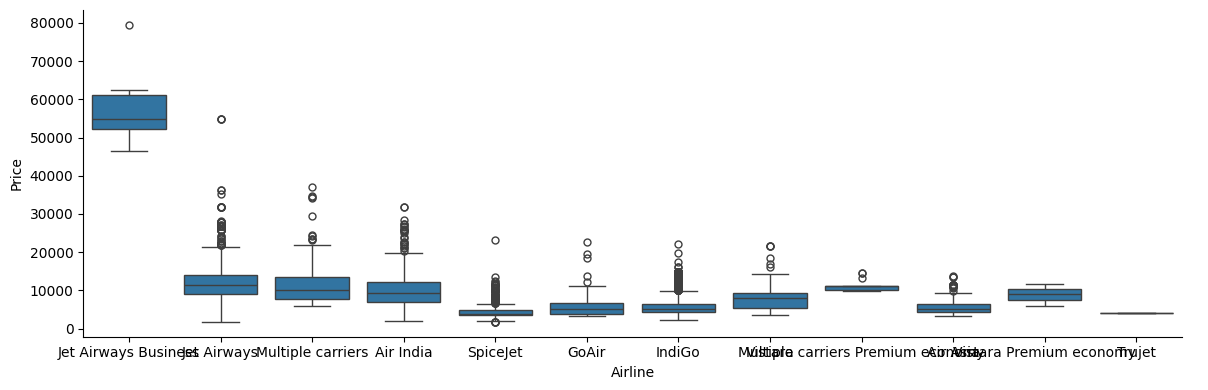

In [40]:
#Taking care of Airline column
print(train['Airline'].unique())
#print(train['Airline'].nunique())
print(train['Airline'].value_counts())
sns.catplot(y = 'Price', x = 'Airline', data = train.sort_values('Price', ascending = False), 
            kind='box', height = 4, aspect = 3, orient='v')
plt.show()

## Encoding the Categorical Variables

Simple categorical encoding can be done with 'pd.get_dummies'

In [41]:
print(train.shape)
train.head()

(10682, 15)


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,2,50,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,7,25,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,19,0,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,25,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,4,45,1,3,16,50,21,35


In [42]:
#select categorical variables from then dataset, and then implement categorical encoding for nominal variables
Airline=train[['Airline']]
Airline=pd.get_dummies(Airline, drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,False,False,True,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,False


In [43]:
Source=train[['Source']]
Source=pd.get_dummies(Source, drop_first= True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [44]:
Destination=train[['Destination']]
Destination=pd.get_dummies(Destination, drop_first= True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


In [45]:
# Concatenate dataset with Airline, Source, Destination, Additional_Info

train = pd.concat([train, Airline, Source, Destination], axis = 1)

#Dropping the non-encoded Airline, Source, Destination variables
train.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route'], axis = 1, inplace = True)
#dropping route column as we have a stop column which basically covers the entire zest of it

In [46]:
# Replacing Total_Stops
train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10004\868300739.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [47]:
print(train.shape)
train.head()

(10682, 30)


,Total_Stops,Price,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,2,50,24,3,22,20,1,10,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7662,7,25,1,5,5,50,13,15,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,13882,19,0,9,6,9,25,4,25,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,6218,5,25,12,5,18,5,23,30,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,13302,4,45,1,3,16,50,21,35,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


# Applying Feature Engineering which we implemented on Training dataset now on Test dataset

First we consider datetime variables

In [48]:
#First we consider Duration column
test["Duration"].value_counts()

Duration
2h 50m     122
1h 30m     107
2h 45m      95
2h 55m      81
3h          72
          ... 
30h 45m      1
32h 5m       1
32h 20m      1
28h 55m      1
5m           1
Name: count, Length: 320, dtype: int64

In [49]:
# Converting 'Duration' column into a list
duration_test = list(test["Duration"])
duration_test

['10h 55m',
 '4h',
 '23h 45m',
 '13h',
 '2h 50m',
 '18h 20m',
 '15h 5m',
 '5h 15m',
 '2h 45m',
 '6h 5m',
 '28h 55m',
 '9h 20m',
 '10h 15m',
 '4h 40m',
 '17h 20m',
 '10h 50m',
 '9h 15m',
 '12h 15m',
 '9h 10m',
 '9h 20m',
 '14h 50m',
 '14h 5m',
 '11h 35m',
 '13h 30m',
 '2h 50m',
 '12h 25m',
 '2h 30m',
 '25h 30m',
 '19h 25m',
 '7h',
 '2h 30m',
 '11h 40m',
 '7h 5m',
 '3h',
 '1h 25m',
 '2h 40m',
 '1h 25m',
 '6h 5m',
 '17h 5m',
 '10h 40m',
 '2h 30m',
 '12h 30m',
 '1h 30m',
 '23h 40m',
 '5h 15m',
 '2h 20m',
 '23h 35m',
 '1h 30m',
 '27h 40m',
 '13h 30m',
 '28h 20m',
 '5h 45m',
 '26h 25m',
 '5h 40m',
 '2h 15m',
 '2h 55m',
 '5h 45m',
 '7h 30m',
 '5h 20m',
 '25h 50m',
 '13h 15m',
 '26h 20m',
 '5h 45m',
 '5h 40m',
 '2h 40m',
 '2h 50m',
 '5h 25m',
 '8h 45m',
 '3h',
 '7h 20m',
 '1h 30m',
 '21h 10m',
 '16h',
 '7h 50m',
 '1h 30m',
 '3h',
 '2h 50m',
 '19h 25m',
 '2h 55m',
 '14h 5m',
 '2h 50m',
 '16h 5m',
 '5h 55m',
 '2h 30m',
 '10h 15m',
 '13h 50m',
 '2h 15m',
 '11h 55m',
 '2h 30m',
 '13h 20m',
 '18h 1

In [50]:
#apply loop to separate hours from minutes
#.split() method splits a string into a list
#also, hour is represented by 'h' and minute by'm'
#.strip() method returns a copy of the string by removing both the leading and the trailing characters
for i in range(len(duration_test)):
    if len(duration_test[i].split()) != 2:   
        if "h" in duration_test[i]:
            duration_test[i] = duration_test[i].strip() + ' 0m'  # add 0 minute 
        else:
            duration_test[i] = '0h '+ duration_test[i]           # add 0 hour
            
duration_hours = []
duration_mins = []
for i in range(len(duration_test)):
    duration_hours.append(int(duration_test[i].split(sep = "h")[0]))
    duration_mins.append(int(duration_test[i].split(sep = "m")[0].split()[-1]))

In [51]:
duration_test

['10h 55m',
 '4h 0m',
 '23h 45m',
 '13h 0m',
 '2h 50m',
 '18h 20m',
 '15h 5m',
 '5h 15m',
 '2h 45m',
 '6h 5m',
 '28h 55m',
 '9h 20m',
 '10h 15m',
 '4h 40m',
 '17h 20m',
 '10h 50m',
 '9h 15m',
 '12h 15m',
 '9h 10m',
 '9h 20m',
 '14h 50m',
 '14h 5m',
 '11h 35m',
 '13h 30m',
 '2h 50m',
 '12h 25m',
 '2h 30m',
 '25h 30m',
 '19h 25m',
 '7h 0m',
 '2h 30m',
 '11h 40m',
 '7h 5m',
 '3h 0m',
 '1h 25m',
 '2h 40m',
 '1h 25m',
 '6h 5m',
 '17h 5m',
 '10h 40m',
 '2h 30m',
 '12h 30m',
 '1h 30m',
 '23h 40m',
 '5h 15m',
 '2h 20m',
 '23h 35m',
 '1h 30m',
 '27h 40m',
 '13h 30m',
 '28h 20m',
 '5h 45m',
 '26h 25m',
 '5h 40m',
 '2h 15m',
 '2h 55m',
 '5h 45m',
 '7h 30m',
 '5h 20m',
 '25h 50m',
 '13h 15m',
 '26h 20m',
 '5h 45m',
 '5h 40m',
 '2h 40m',
 '2h 50m',
 '5h 25m',
 '8h 45m',
 '3h 0m',
 '7h 20m',
 '1h 30m',
 '21h 10m',
 '16h 0m',
 '7h 50m',
 '1h 30m',
 '3h 0m',
 '2h 50m',
 '19h 25m',
 '2h 55m',
 '14h 5m',
 '2h 50m',
 '16h 5m',
 '5h 55m',
 '2h 30m',
 '10h 15m',
 '13h 50m',
 '2h 15m',
 '11h 55m',
 '2h 30m'

In [52]:
test['Duration_hrs'] = duration_hours
test['Duration_hrs']

0       10
1        4
2       23
3       13
4        2
        ..
2666    23
2667     2
2668     6
2669    15
2670    14
Name: Duration_hrs, Length: 2671, dtype: int64

In [53]:
test['Duration_mins'] = duration_mins
test['Duration_mins']

0       55
1        0
2       45
3        0
4       50
        ..
2666    55
2667    35
2668    35
2669    15
2670    20
Name: Duration_mins, Length: 2671, dtype: int64

In [54]:
test.drop('Duration', axis=1, inplace=True)

In [55]:
test['Day_of_Journey']=pd.to_datetime(test['Date_of_Journey'], format='%d/%m/%Y').dt.day
test['Month_of_Journey']=pd.to_datetime(test['Date_of_Journey'], format='%d/%m/%Y').dt.month
test.drop('Date_of_Journey', axis = 1, inplace = True)

test['Dep_hr'] = pd.to_datetime(test['Dep_Time']).dt.hour
test['Dep_min'] = pd.to_datetime(test['Dep_Time']).dt.minute
test.drop('Dep_Time', axis = 1, inplace = True)

test['Arrival_hr'] = pd.to_datetime(test['Arrival_Time']).dt.hour
test['Arrival_min'] = pd.to_datetime(test['Arrival_Time']).dt.minute
test.drop('Arrival_Time', axis = 1, inplace = True)

C:\Users\HP\AppData\Local\Temp\ipykernel_10004\239009649.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['Dep_hr'] = pd.to_datetime(test['Dep_Time']).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_10004\239009649.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['Dep_min'] = pd.to_datetime(test['Dep_Time']).dt.minute
C:\Users\HP\AppData\Local\Temp\ipykernel_10004\239009649.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  test['Arrival_hr'] = pd.to_datetime(test['Arrival_Time']).dt.hour
C:\Users\HP\AppData\Local\Temp\ipykernel_10004\239009649.py:10: User

In [56]:
print('Test dataset shape:', test.shape)

Test dataset shape: (2671, 14)


Now that the datetime variables have been taken care of, we shift our focus to categorical variable columns. 

In [57]:
#select categorical variables from then dataset, and then implement categorical encoding for nominal variables
Airline=test[['Airline']]
Airline=pd.get_dummies(Airline, drop_first=True)

Source=test[['Source']]
Source=pd.get_dummies(Source, drop_first= True)

Destination=test[['Destination']]
Destination=pd.get_dummies(Destination, drop_first= True)


# Concatenate dataset with Airline, Source, Destination, Additional_Info
test= pd.concat([test, Airline, Source, Destination], axis = 1)

#Dropping the non-encoded Airline, Source, Destination variables
test.drop(['Airline', 'Source', 'Destination', 'Additional_Info', 'Route'], axis = 1, inplace = True)
#dropping route column as we have a stop column which basically covers the entire zest of it 


#Let's take care of Total_Stops
test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
test['Total_Stops'] = encoder.fit_transform(test['Total_Stops'])

print(test.shape)
test.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_10004\863167924.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


(2671, 28)


,Total_Stops,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,10,55,6,6,17,30,4,25,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
1,1,4,0,12,5,6,20,10,20,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,1,23,45,21,5,19,15,19,0,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,13,0,21,5,8,0,21,0,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False
4,0,2,50,24,6,23,55,2,45,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [58]:
train.columns

Index(['Total_Stops', 'Price', 'Duration_hrs', 'Duration_mins',
       'Day_of_Journey', 'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [59]:
test.columns

Index(['Total_Stops', 'Duration_hrs', 'Duration_mins', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Chennai',
       'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [60]:
#train.drop(labels=['Airline_Trujet'], axis=1, inplace=True)

## Building the training and test dataset

In [61]:
train.dtypes

Total_Stops                                  int64
Price                                        int64
Duration_hrs                                 int64
Duration_mins                                int64
Day_of_Journey                               int32
Month_of_Journey                             int32
Dep_hr                                       int32
Dep_min                                      int32
Arrival_hr                                   int32
Arrival_min                                  int32
Airline_Air India                             bool
Airline_GoAir                                 bool
Airline_IndiGo                                bool
Airline_Jet Airways                           bool
Airline_Jet Airways Business                  bool
Airline_Multiple carriers                     bool
Airline_Multiple carriers Premium economy     bool
Airline_SpiceJet                              bool
Airline_Trujet                                bool
Airline_Vistara                

In [62]:
price=train.Price
train.drop('Price', axis=1, inplace=True)
train=train.join(price)
train.head()

,Total_Stops,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Price
0,0,2,50,24,3,22,20,1,10,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,3897
1,2,7,25,1,5,5,50,13,15,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,7662
2,2,19,0,9,6,9,25,4,25,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,13882
3,1,5,25,12,5,18,5,23,30,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,6218
4,1,4,45,1,3,16,50,21,35,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,13302


In [63]:
X = train.loc[:, ['Total_Stops', 'Duration_hrs', 'Duration_mins',
       'Day_of_Journey', 'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr',
       'Arrival_min', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Duration_hrs,Duration_mins,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,2,50,24,3,22,20,1,10,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,2,7,25,1,5,5,50,13,15,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2,2,19,0,9,6,9,25,4,25,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False
3,1,5,25,12,5,18,5,23,30,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
4,1,4,45,1,3,16,50,21,35,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [64]:
y = train.iloc[:, -1]
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10682, dtype: int64

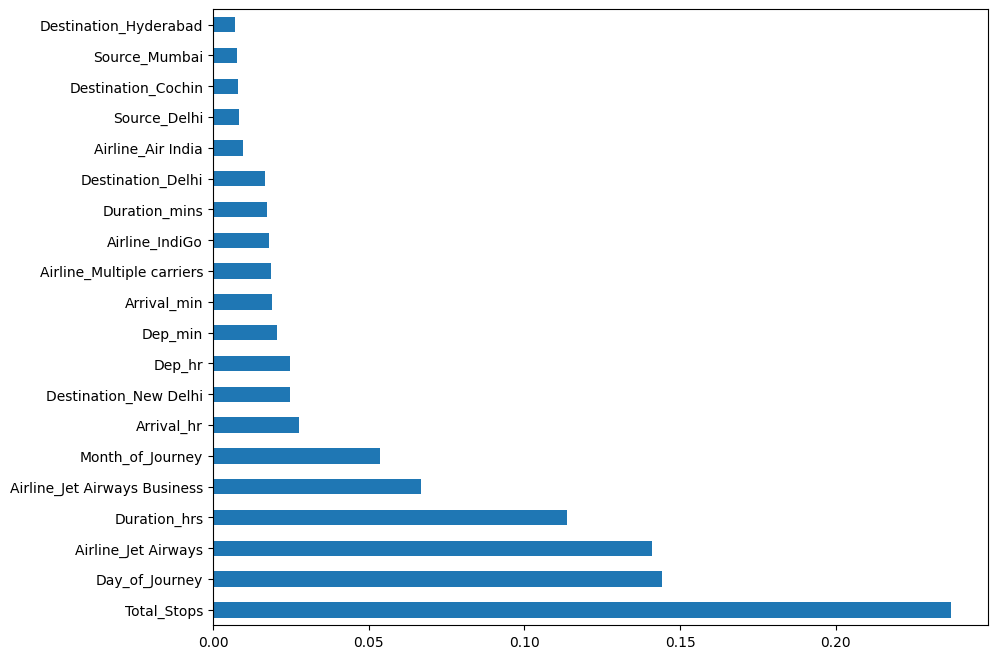

In [65]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

#bar graph of feature importances 
plt.figure(figsize = (10,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

From the above graph, "Total_Stops" is the most important feature. Looking closely, at the high end of the feature importance spectrum, there are no 2 features which are similar in their importance. However, at the lower end, we have 4 features which are almost similar in their importance. So, here I may decide on reducing the dimensionality of the features but chose not to do so because the dimensionality of the dataset is not too large and my model seems to handle it well.

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=20)

In [67]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state=0)

# Training Models

##### R2 is a statistic that will give some information about the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data.

#### Linear Regression

In [68]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred=lin_reg.predict(X_test)

print("Linear Regression Score on Training set is",lin_reg.score(X_train, y_train))#Training Accuracy
print("Linear Regression Score on Test Set is",lin_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(lin_reg, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

Linear Regression Score on Training set is 0.6322111689884418
Linear Regression Score on Test Set is 0.5888624736053238


c:\Users\HP\Desktop\Flight Fare Prediction\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(


[0.56348676 0.57670098 0.52741887 0.60808342 0.60919873 0.60086468
 0.5842344  0.63494715 0.61983204 0.75026022 0.64213992 0.60795505
 0.64426589 0.77259987 0.66851263 0.65452885 0.67243843 0.68811753
 0.58903934 0.48634241]
Accuracy: 62.50 %
Standard Deviation: 6.58 %
Mean Absolute Error: 2048.267321303229
Mean Squared Error: 9646591.717893166
RMSE: 3105.8962825395774
The r2_score is 0.5888624736053238


#### Decision Tree Regressor

In [69]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(X_train, y_train)
y_pred=dt_reg.predict(X_test)

print("Decision Tree Score on Training set is",dt_reg.score(X_train, y_train))#Training Accuracy
print("Decision Tree Score on Test Set is",dt_reg.score(X_test, y_test))#Testing Accuracy

accuracies = cross_val_score(dt_reg, X_train, y_train, cv = kfold)
print(accuracies)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

mae=mean_absolute_error(y_pred, y_test)
print("Mean Absolute Error:" , mae)

mse=mean_squared_error(y_test, y_pred)
print("Mean Squared Error:" , mse)

print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('The r2_score is', metrics.r2_score(y_test, y_pred))

Decision Tree Score on Training set is 0.9711683243930616
Decision Tree Score on Test Set is 0.6954008339903984


c:\Users\HP\Desktop\Flight Fare Prediction\.venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=20.
  warnings.warn(


[0.76632498 0.73377156 0.63841465 0.70883606 0.77836437 0.74763147
 0.70082349 0.62857383 0.66322775 0.71009527 0.69802443 0.71596437
 0.77150069 0.77623934 0.73944594 0.75718428 0.75660023 0.67252257
 0.69490409 0.69643139]
Accuracy: 71.77 %
Standard Deviation: 4.36 %
Mean Absolute Error: 1431.794018093901
Mean Squared Error: 7146863.527326601
RMSE: 2673.3618399548163
The r2_score is 0.6954008339903984


#### Random Forest

In [70]:
#Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators=400,min_samples_split=15,min_samples_leaf=2, max_depth=30)
rf_reg.fit(X_train, y_train)
y_pred=rf_reg.predict(X_test)

print("Random Forest Score on Training set is",rf_reg.score(X_train, y_train))#Training Accuracy
print("Random Forest Score on Test Set is",rf_reg.score(X_test, y_test))#Testing Accuracy


Random Forest Score on Training set is 0.8894161043922618
Random Forest Score on Test Set is 0.8221103457744503



#### When all the metrics are considered, Random Forest Regressor model gave me the best scores.   

## Save the Model and dump as a Pickle File

In [71]:
import joblib
# dump information to the file
joblib.dump(rf_reg, open('flight.joblib', 'wb'))
model = joblib.load(open('flight.joblib', 'rb'))

In [72]:
model.predict([[0,2,50,24,3,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1]])

c:\Users\HP\Desktop\Flight Fare Prediction\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([5291.38794883])